In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

In [4]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 17.0+ KB


In [8]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [10]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [11]:
df.at[336,'sex']='FEMALE'

In [12]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

In [13]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

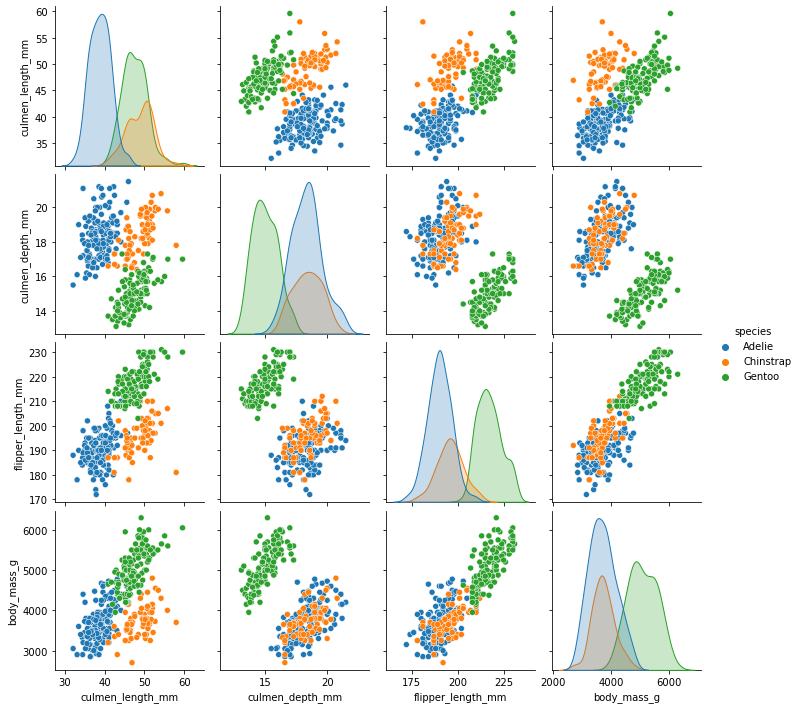

In [14]:
sns.pairplot(df, hue='species')

In [18]:
X=pd.get_dummies(df.drop('species', axis=1),drop_first=True)

In [19]:
y=df['species']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=101)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
#help(DecisionTreeClassifier)

In [25]:
model=DecisionTreeClassifier()

In [26]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
base_pred=model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [30]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



In [32]:
import warnings
warnings.filterwarnings('ignore')

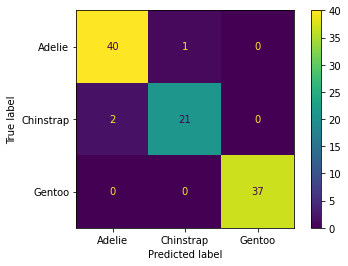

In [33]:
plot_confusion_matrix(model,X_test,y_test)

In [34]:
model.feature_importances_

array([0.33754639, 0.05221421, 0.542054  , 0.        , 0.0681854 ,
       0.        , 0.        ])

In [39]:
pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
culmen_depth_mm,0.052214
island_Dream,0.068185
culmen_length_mm,0.337546
flipper_length_mm,0.542054


In [40]:
from sklearn.tree import plot_tree

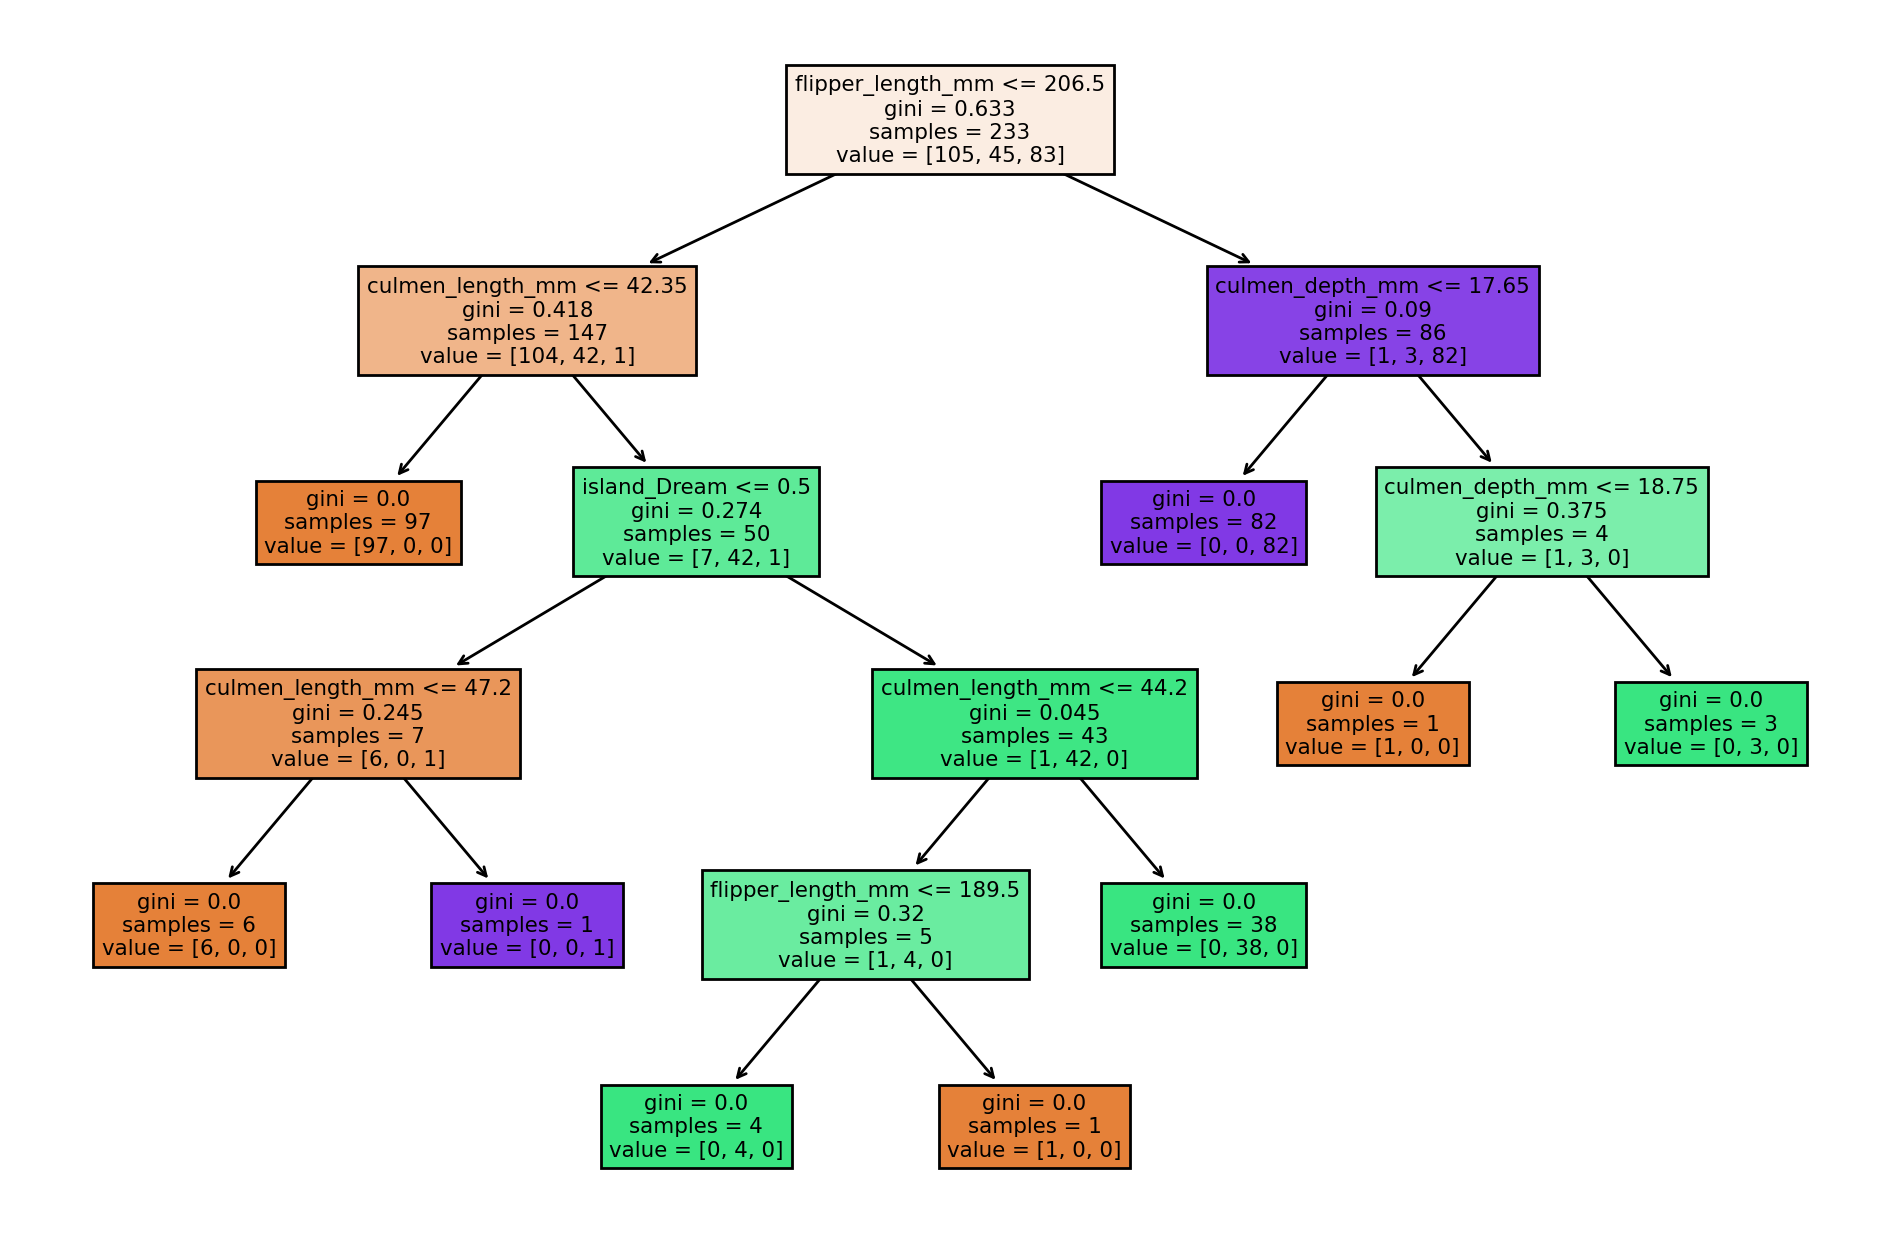

In [47]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model, feature_names=X.columns,filled=True);

In [48]:
def report_model(model):
    model_pred=model.predict(X_test)
    print(classification_report(y_test,model_pred))
    print('\n')
    plt.figure(figsize=(12,8),dpi=200)
    plot_tree(model, feature_names=X.columns,filled=True);

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





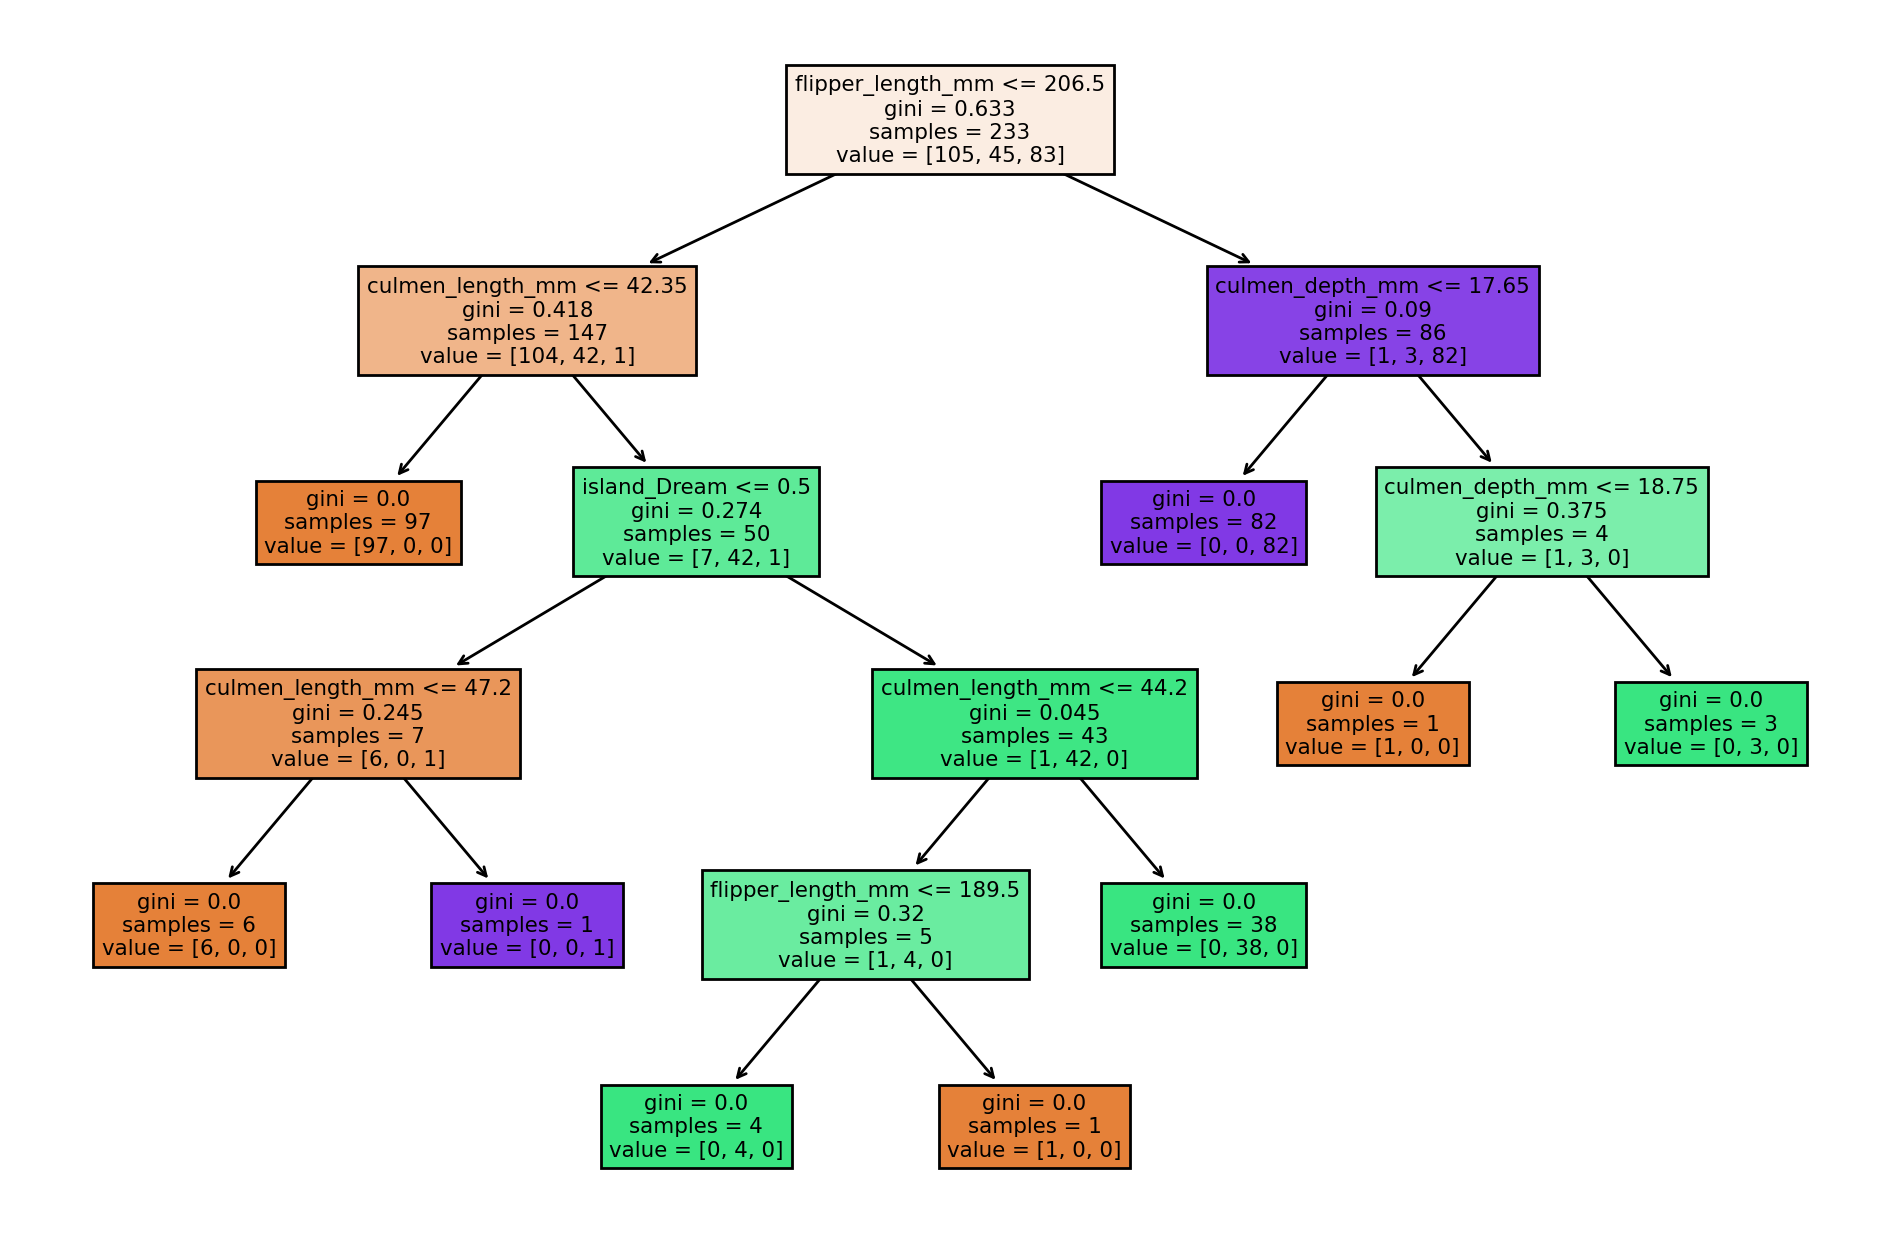

In [49]:
report_model(model)

In [59]:
pruned_tree=DecisionTreeClassifier(max_depth=3)

In [60]:
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101





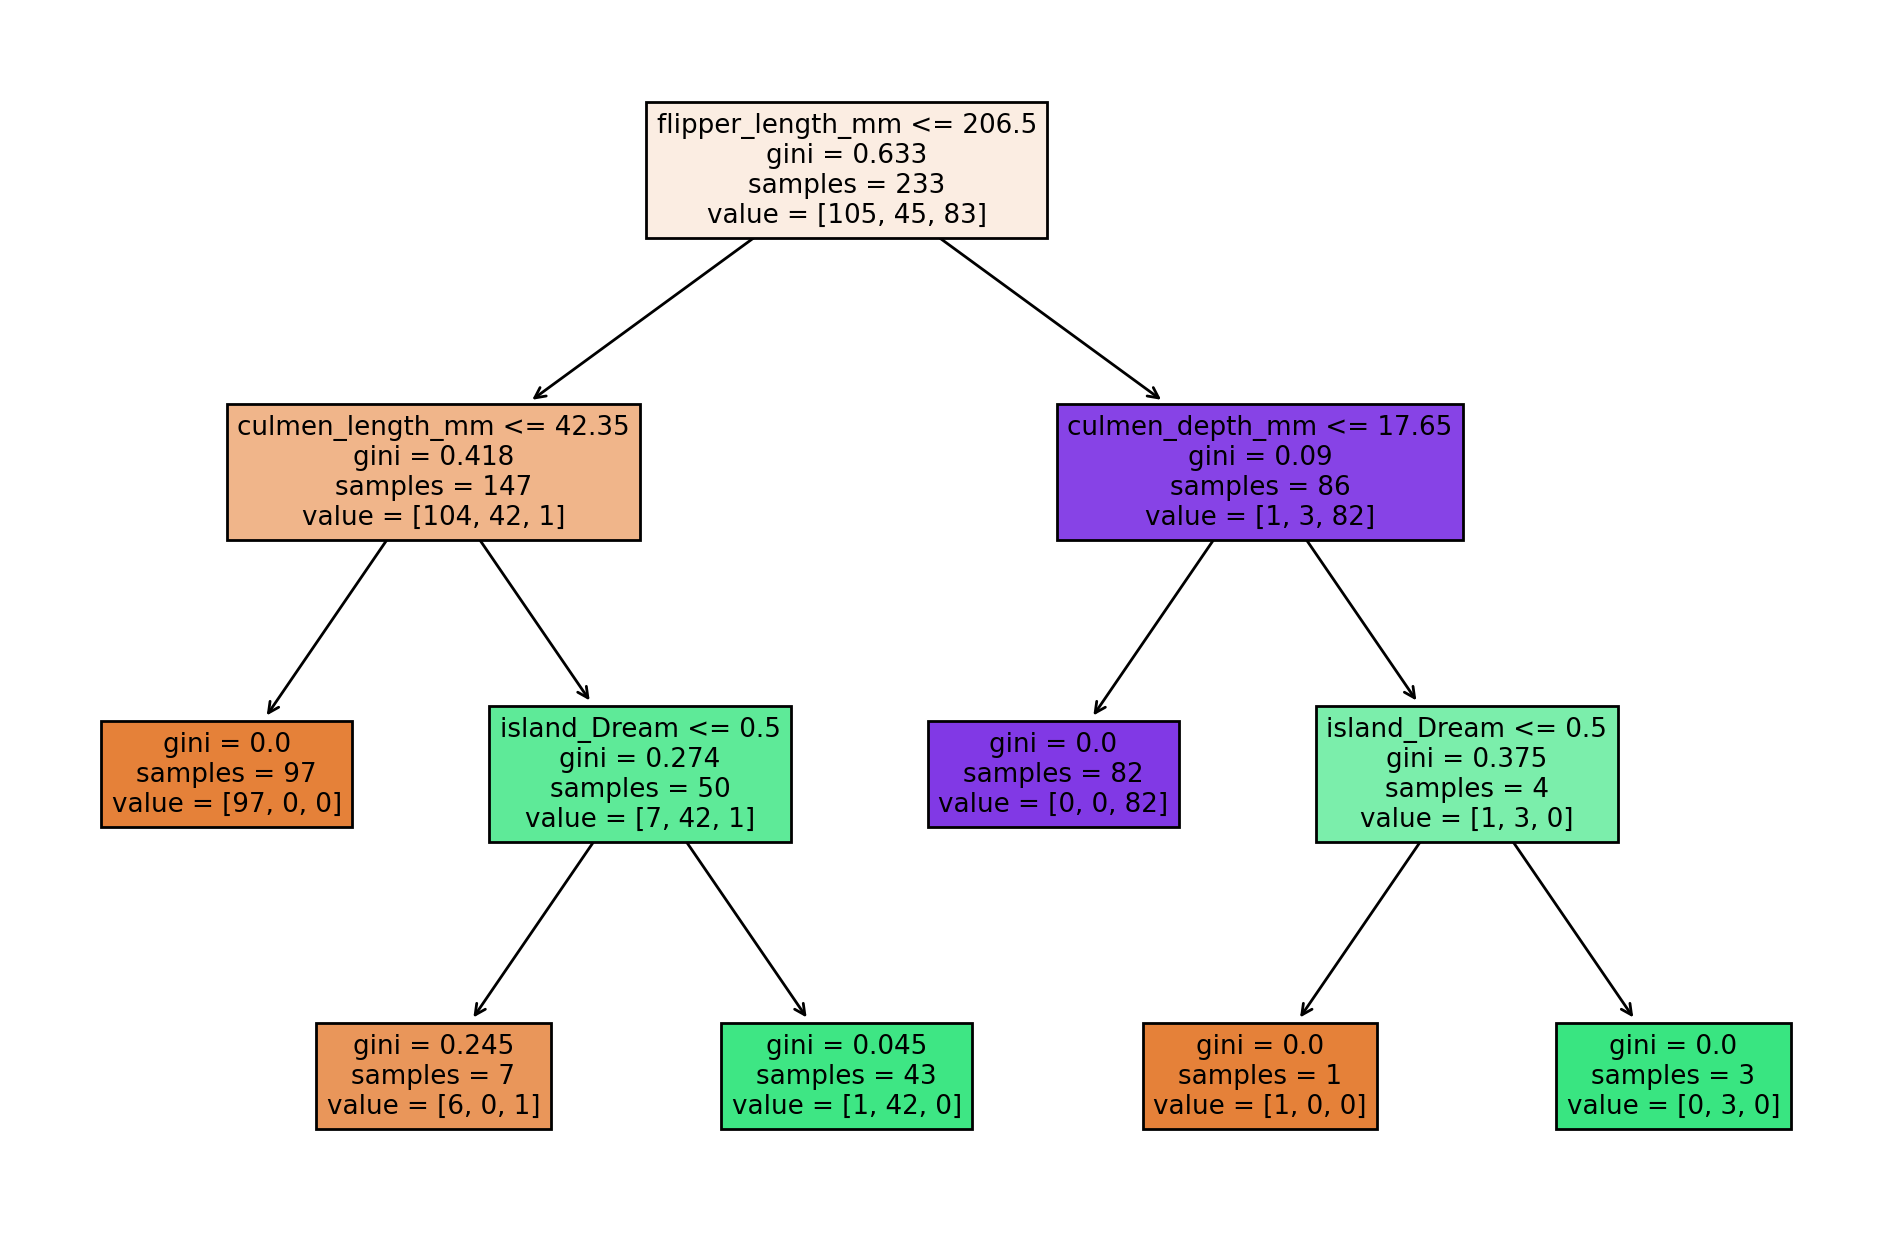

In [61]:
report_model(pruned_tree)

In [74]:
max_leaf_nodes=DecisionTreeClassifier(max_leaf_nodes=3)

In [75]:
max_leaf_nodes.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





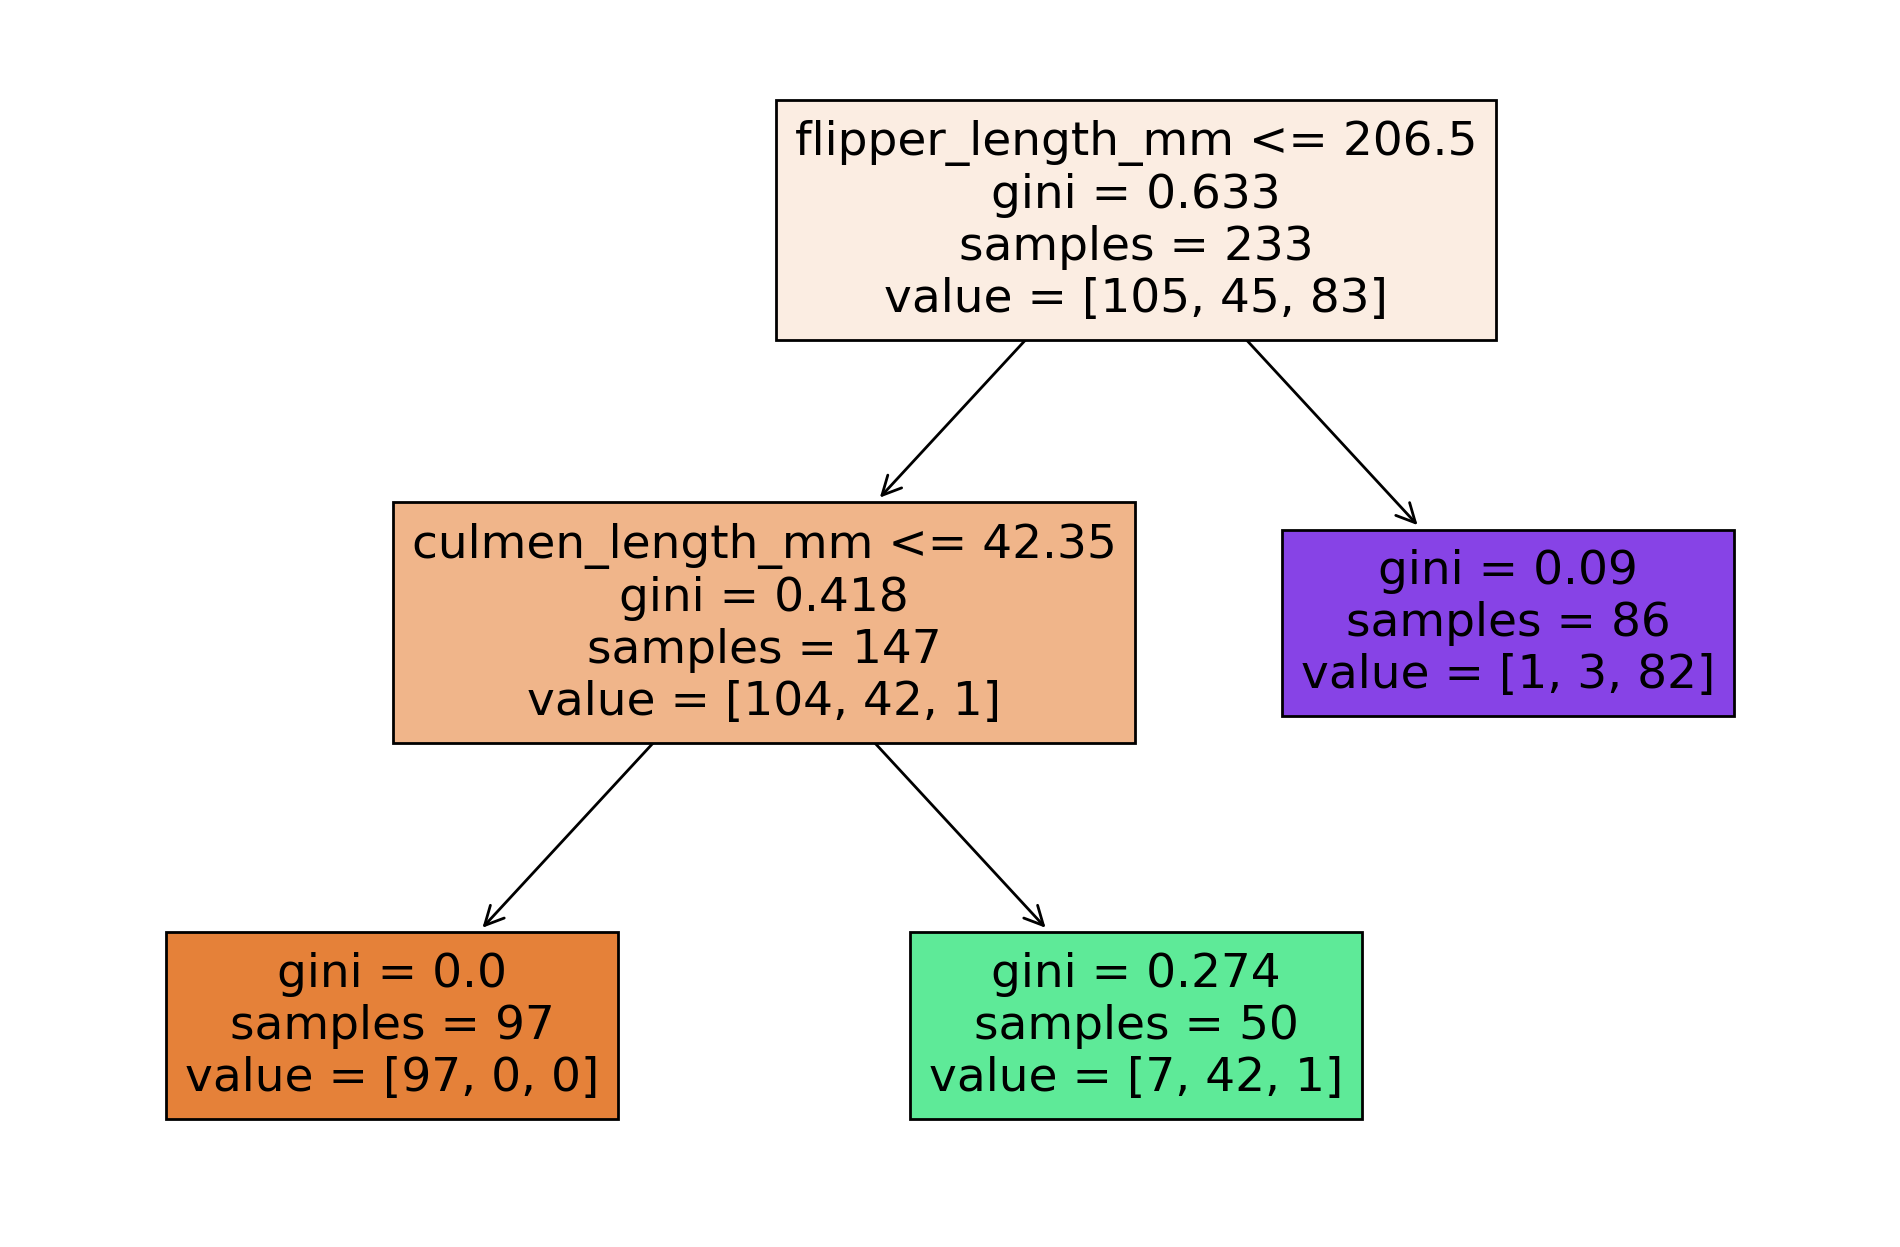

In [76]:
report_model(max_leaf_nodes)

In [77]:
entropy=DecisionTreeClassifier(criterion='entropy')

In [78]:
entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101





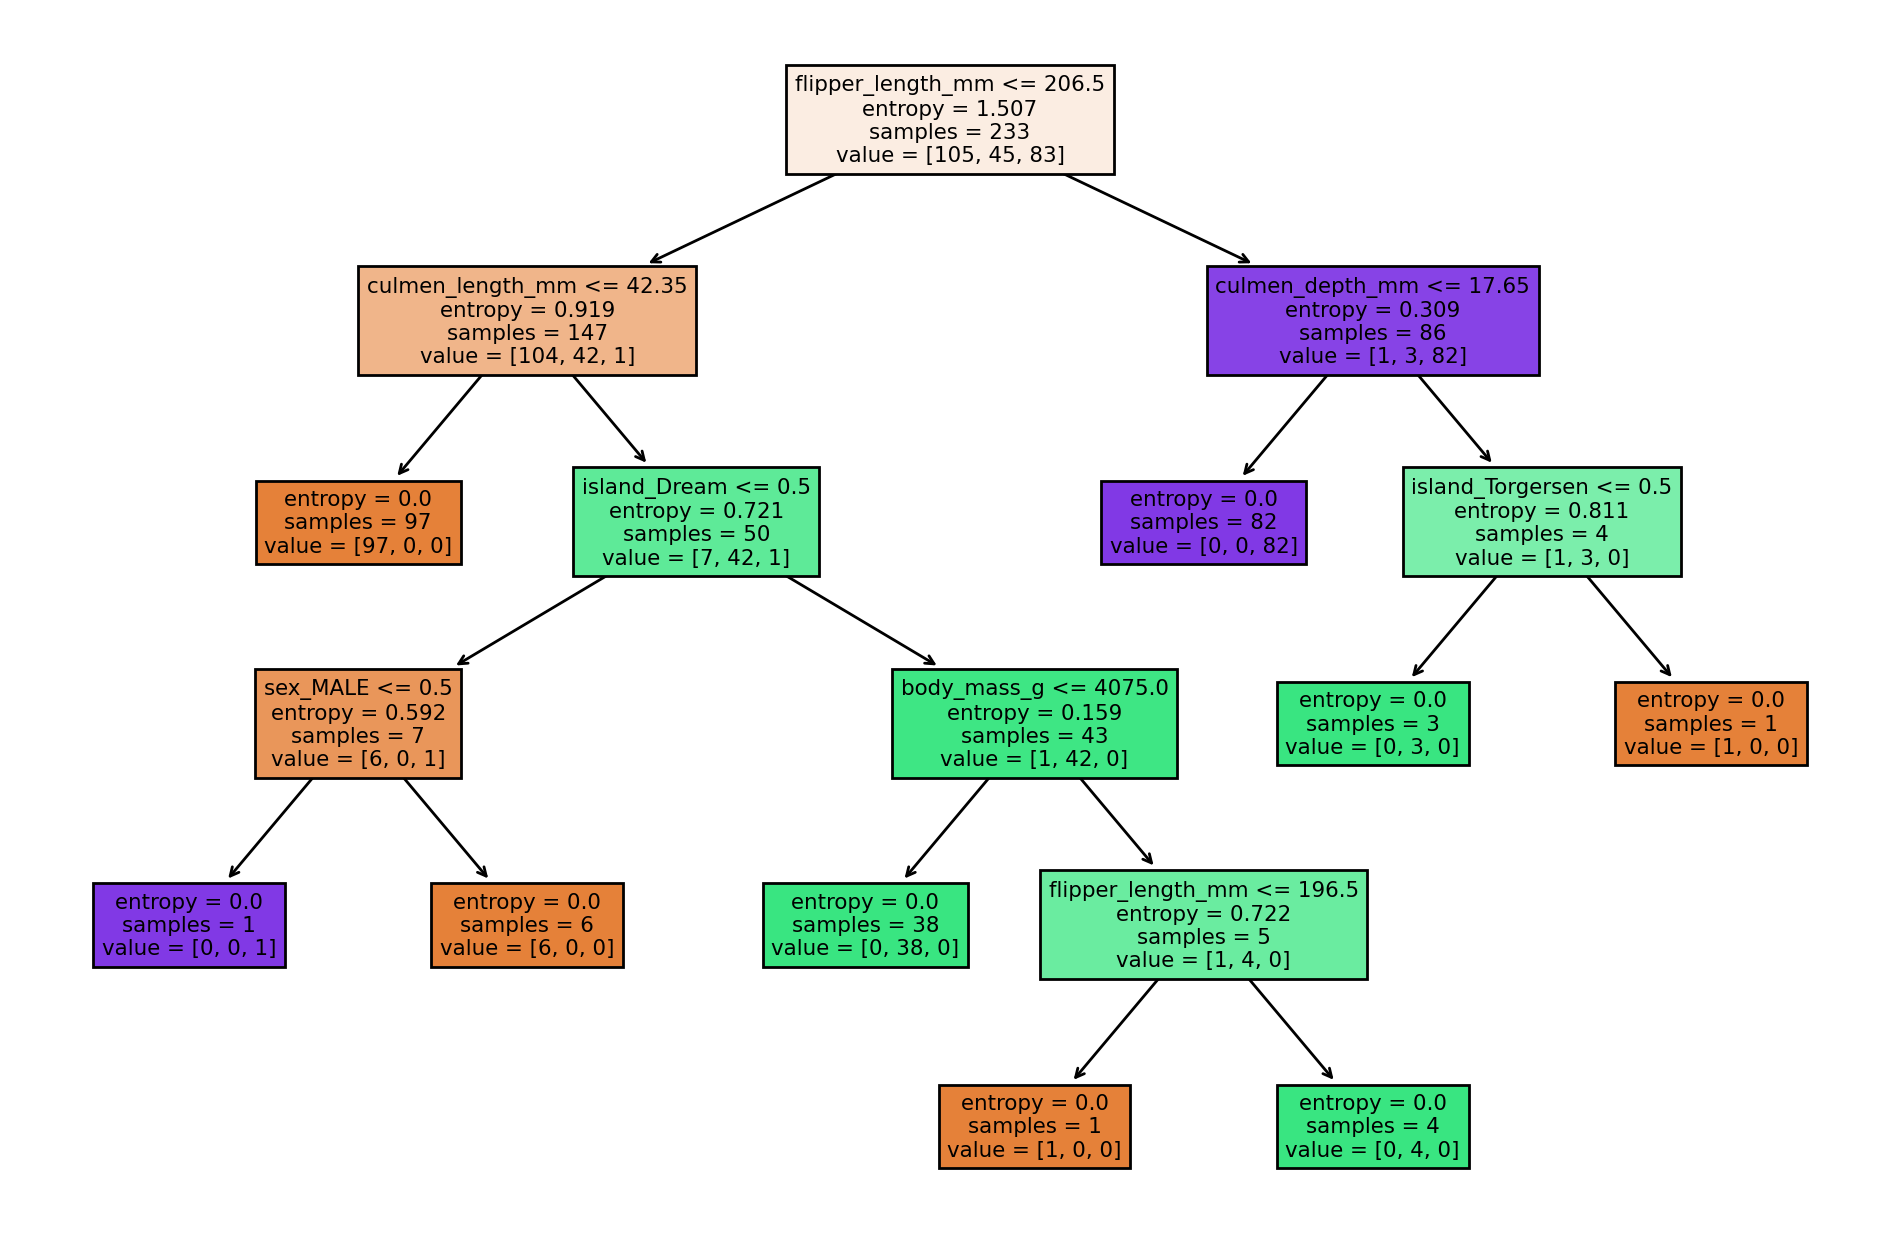

In [79]:
report_model(entropy)